# *Olympic Medals 1896-2024*

Joseph Lardie

August 2024

# *Imports*

In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import plotly
import plotly.express as px 
import seaborn as sns

# Geographical data conversion
import pycountry_convert as pc
import country_converter as coco

# Statistical analysis
import scipy.stats as stats
from scipy.stats import f_oneway
from math import pi

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# *Loading Data*

In [2]:
# Loading Medal Data for 1896-2020
Medals = pd.read_csv("F:\Coding Dojo\Data\Olympic File 2024\medals.csv")

In [3]:
# Loading Medal Data for 2024
smd = pd.read_csv("F:\Coding Dojo\Data\Olympic File 2024\Summer_olympic_Medals 1896_2020.csv")

# *Data Exploration*

In [4]:
# Preview of Medals Data for 2024
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   country_long  92 non-null     object
 3   Gold Medal    92 non-null     int64 
 4   Silver Medal  92 non-null     int64 
 5   Bronze Medal  92 non-null     int64 
 6   Total         92 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.2+ KB


In [5]:
# Inspecting Medals from 2024
Medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [6]:
# Preview of Medals Data for 1896-2020
smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1344 non-null   int64 
 1   Host_country  1344 non-null   object
 2   Host_city     1344 non-null   object
 3   Country_Name  1344 non-null   object
 4   Country_Code  1258 non-null   object
 5   Gold          1344 non-null   int64 
 6   Silver        1344 non-null   int64 
 7   Bronze        1344 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 84.1+ KB


In [7]:
# Inspecting data from 1896-2020
smd.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


# *Data Cleaning*

In [8]:
#Dropping unnecessary collumns
columns_to_drop = ["country_long"]
Medals = Medals.drop(columns_to_drop, axis = 1)
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


In [9]:
# Adding in columns missing from 2024 medal totals data Taht are already in the other data set
Medals['Year'] = 2024
Medals['Host_country'] = "France"
Medals['Host_city'] = "Paris" 

In [10]:
# Confiming new columns were added
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
 6   Year          92 non-null     int64 
 7   Host_country  92 non-null     object
 8   Host_city     92 non-null     object
dtypes: int64(5), object(4)
memory usage: 6.6+ KB


In [11]:
# Check for missing values
print("There are", Medals.isna().sum().sum(), "missing values total.")

There are 0 missing values total.


In [12]:
# Confiming data was added to the dataframe
Medals.head()

,country_code,country,Gold Medal,Silver Medal,Bronze Medal,Total,Year,Host_country,Host_city
0,USA,United States,40,44,42,126,2024,France,Paris
1,CHN,China,40,27,24,91,2024,France,Paris
2,JPN,Japan,20,12,13,45,2024,France,Paris
3,AUS,Australia,18,19,16,53,2024,France,Paris
4,FRA,France,16,26,22,64,2024,France,Paris


In [13]:
# Renaming columns to match the other data set
Medals.rename(columns={
    'country_code': 'Country_Code',
    'country': 'Country_Name',
    'Gold Medal': 'Gold',
    'Silver Medal': 'Silver',
    'Bronze Medal': 'Bronze',
    'Total': 'Total_Medals'
}, inplace=True)

In [14]:
# Confirming column names were changed
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_Code  92 non-null     object
 1   Country_Name  92 non-null     object
 2   Gold          92 non-null     int64 
 3   Silver        92 non-null     int64 
 4   Bronze        92 non-null     int64 
 5   Total_Medals  92 non-null     int64 
 6   Year          92 non-null     int64 
 7   Host_country  92 non-null     object
 8   Host_city     92 non-null     object
dtypes: int64(5), object(4)
memory usage: 6.6+ KB


In [15]:
# Confirming column names are matching other dataset
smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1344 non-null   int64 
 1   Host_country  1344 non-null   object
 2   Host_city     1344 non-null   object
 3   Country_Name  1344 non-null   object
 4   Country_Code  1258 non-null   object
 5   Gold          1344 non-null   int64 
 6   Silver        1344 non-null   int64 
 7   Bronze        1344 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 84.1+ KB


In [16]:
# Adding a Total_Medals column to the smd data
smd['Total_Medals'] = smd['Gold'] + smd['Silver'] + smd['Bronze']

In [17]:
# Confiming column was added
smd.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


# *Merging Data Frames Together*

In [18]:
# concatenating the two datasets together
df = pd.concat([smd, Medals], ignore_index=True)

In [19]:
# Checking that the dataframes merged properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1436 non-null   int64 
 1   Host_country  1436 non-null   object
 2   Host_city     1436 non-null   object
 3   Country_Name  1436 non-null   object
 4   Country_Code  1350 non-null   object
 5   Gold          1436 non-null   int64 
 6   Silver        1436 non-null   int64 
 7   Bronze        1436 non-null   int64 
 8   Total_Medals  1436 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 101.1+ KB


In [20]:
# Check for missing values
print("There are", df.isna().sum().sum(), "missing values total.")

There are 86 missing values total.


In [21]:
#Looking at location missing values
df.isna().sum()

Year             0
Host_country     0
Host_city        0
Country_Name     0
Country_Code    86
Gold             0
Silver           0
Bronze           0
Total_Medals     0
dtype: int64

## *Function to replace missing values*

In [22]:
# Create a mapping from Country_Name to Country_Code using rows with non-missing Country_Code
country_code_map = df.dropna(subset=['Country_Code'])[['Country_Name', 'Country_Code']].drop_duplicates()
country_code_map = country_code_map.set_index('Country_Name')['Country_Code'].to_dict()

# Function to fill missing Country_Code using the Country_Name
def fill_country_code(row):
    if pd.isna(row['Country_Code']):
        return country_code_map.get(row['Country_Name'], None)
    return row['Country_Code']

# Apply the function to fill missing Country_Code values
df['Country_Code'] = df.apply(fill_country_code, axis=1)

# Check if there are any remaining missing values
missing_codes = df[df['Country_Code'].isna()]
print(missing_codes)

      Year Host_country       Host_city                  Country_Name  \
1233  2016       Brazil  Rio de Janeiro  Independent Olympic Athletes   

     Country_Code  Gold  Silver  Bronze  Total_Medals  
1233         None     1       0       1             2  


## *Creating a function to fill in missing abbreviation*

In [23]:
# Create a mapping from Country_Name to Country_Code using rows with non-missing Country_Code and adding 'IOA' for Idependent Olympic Athletes.
def fill_country_code(row):
    if pd.isna(row['Country_Code']):
        if row['Country_Name'].lower() == 'independent olympic athletes':
            return 'IOA'  # Or some other code/leave it as None
        return country_code_map.get(row['Country_Name'].lower(), None)
    return row['Country_Code']
df['Country_Code'] = df.apply(fill_country_code, axis=1)
# Check if there are any remaining missing values
missing_codes = df[df['Country_Code'].isna()]
print(missing_codes)

Empty DataFrame
Columns: [Year, Host_country, Host_city, Country_Name, Country_Code, Gold, Silver, Bronze, Total_Medals]
Index: []


In [24]:
#Looking at missing values for each column
df.isna().sum()

Year            0
Host_country    0
Host_city       0
Country_Name    0
Country_Code    0
Gold            0
Silver          0
Bronze          0
Total_Medals    0
dtype: int64

In [25]:
# Inpsecting data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1436 non-null   int64 
 1   Host_country  1436 non-null   object
 2   Host_city     1436 non-null   object
 3   Country_Name  1436 non-null   object
 4   Country_Code  1436 non-null   object
 5   Gold          1436 non-null   int64 
 6   Silver        1436 non-null   int64 
 7   Bronze        1436 non-null   int64 
 8   Total_Medals  1436 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 101.1+ KB


In [26]:
# Checking data is merged properly and accurate
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


In [27]:
# Checking data is merged properly and accurate
print(df)

      Year Host_country Host_city   Country_Name Country_Code  Gold  Silver  \
0     1896       Greece    Athens  Great Britain          GBR     2       3   
1     1896       Greece    Athens        Hungary          HUN     2       1   
2     1896       Greece    Athens         France          FRA     5       4   
3     1896       Greece    Athens  United States          USA    11       7   
4     1896       Greece    Athens        Germany          GER     6       5   
...    ...          ...       ...            ...          ...   ...     ...   
1431  2024       France     Paris           Peru          PER     0       0   
1432  2024       France     Paris          Qatar          QAT     0       0   
1433  2024       France     Paris      Singapore          SGP     0       0   
1434  2024       France     Paris       Slovakia          SVK     0       0   
1435  2024       France     Paris         Zambia          ZAM     0       0   

      Bronze  Total_Medals  
0          2          

In [28]:
# Checking Unique values
unique_counts = df.nunique()
print(unique_counts)

Year             30
Host_country     21
Host_city        23
Country_Name    171
Country_Code    163
Gold             51
Silver           44
Bronze           43
Total_Medals     96
dtype: int64


# *Feature Engineering*

## *Medal Efficiency*

In [29]:
# Medal Efficiency: Total Medals / Number of Years
df['Medal_Efficiency'] = df['Total_Medals'] / (df['Year'] - df.groupby('Country_Name')['Year'].transform('min') + 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1436 non-null   int64  
 1   Host_country      1436 non-null   object 
 2   Host_city         1436 non-null   object 
 3   Country_Name      1436 non-null   object 
 4   Country_Code      1436 non-null   object 
 5   Gold              1436 non-null   int64  
 6   Silver            1436 non-null   int64  
 7   Bronze            1436 non-null   int64  
 8   Total_Medals      1436 non-null   int64  
 9   Medal_Efficiency  1436 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 112.3+ KB


## *Host Advantage*

In [31]:
# Host Advantage: Binary feature indicating whether the country was the host in that year
df['Host_Advantage'] = df.apply(lambda x: 1 if x['Host_country'] == x['Country_Name'] else 0, axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1436 non-null   int64  
 1   Host_country      1436 non-null   object 
 2   Host_city         1436 non-null   object 
 3   Country_Name      1436 non-null   object 
 4   Country_Code      1436 non-null   object 
 5   Gold              1436 non-null   int64  
 6   Silver            1436 non-null   int64  
 7   Bronze            1436 non-null   int64  
 8   Total_Medals      1436 non-null   int64  
 9   Medal_Efficiency  1436 non-null   float64
 10  Host_Advantage    1436 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 123.5+ KB


## *Continent Aggregation FIXED*

In [33]:
# Get unique values in the 'Country_Code' column
unique_country_codes = df['Country_Code'].unique()

# Print the unique country codes
print(unique_country_codes)

['GBR' 'HUN' 'FRA' 'USA' 'GER' 'AUT' 'ZZX' 'GRE' 'SUI' 'AUS' 'DEN' 'ITA'
 'CUB' 'IND' 'NED' 'BOH' 'BEL' 'SWE' 'ESP' 'CAN' 'LUX' 'NOR' 'ANZ' 'RU1'
 'RSA' 'FIN' 'BRA' 'TCH' 'NZL' 'JPN' 'EST' 'HAI' 'ROU' 'POL' 'POR' 'ARG'
 'YUG' 'URU' 'PHI' 'CHI' 'EGY' 'IRL' 'LAT' 'MEX' 'TUR' 'JAM' 'PER' 'KOR'
 'TRI' 'PAN' 'PUR' 'IRI' 'CEY' 'URS' 'VEN' 'BUL' 'LIB' 'BAH' 'PAK' 'ISL'
 'EUA' 'ETH' 'SIN' 'ROC' 'MAR' 'BWI' 'IRQ' 'GHA' 'KEN' 'NGR' 'TUN' 'GDR'
 'FRG' 'UGA' 'CMR' 'MGL' 'PRK' 'NIG' 'COL' 'THA' 'BER' 'TAN' 'ZIM' 'GUY'
 'ZAM' 'DOM' 'CHN' 'SYR' 'CIV' 'TPE' 'ALG' 'ISV' 'AHO' 'SEN' 'DJI' 'SUR'
 'CRC' 'INA' 'EUN' 'SLO' 'QAT' 'MAS' 'LTU' 'IOP' 'CRO' 'ISR' 'NAM' 'KAZ'
 'BLR' 'UKR' 'RUS' 'CZE' 'TGA' 'GEO' 'AZE' 'MOZ' 'UZB' 'BDI' 'ARM' 'SVK'
 'MDA' 'HKG' 'ECU' 'KSA' 'BAR' 'SRI' 'VIE' 'KUW' 'KGZ' 'MKD' 'SCG' 'UAE'
 'PAR' 'ERI' 'SAM' 'SRB' 'TJK' 'MRI' 'TOG' 'SUD' 'AFG' 'TTO' 'GUA' 'GAB'
 'MNE' 'CYP' 'BOT' 'GRN' 'BRN' 'IOA' 'JOR' 'FIJ' 'KOS' 'SGP' 'SMR' 'TKM'
 'BUR' 'AIN' 'LCA' 'DMA' 'ALB' 'CPV' 'EOR']


In [34]:
# Manual mapping of country codes to continents
continent_map = {
    # Europe
    'GBR': 'Europe', 'HUN': 'Europe', 'FRA': 'Europe', 'GER': 'Europe', 'AUT': 'Europe', 
    'GRE': 'Europe', 'SUI': 'Europe', 'DEN': 'Europe', 'ITA': 'Europe', 'NED': 'Europe', 
    'BOH': 'Europe', 'BEL': 'Europe', 'SWE': 'Europe', 'ESP': 'Europe', 'LUX': 'Europe', 
    'NOR': 'Europe', 'FIN': 'Europe', 'EST': 'Europe', 'ROU': 'Europe', 'POL': 'Europe', 
    'POR': 'Europe', 'YUG': 'Europe', 'LAT': 'Europe', 'TCH': 'Europe', 'EUA': 'Europe',
    'GDR': 'Europe', 'FRG': 'Europe', 'SLO': 'Europe', 'LTU': 'Europe', 'CRO': 'Europe', 
    'BLR': 'Europe', 'UKR': 'Europe', 'RUS': 'Europe', 'CZE': 'Europe', 'GEO': 'Europe',
    'AZE': 'Europe', 'ARM': 'Europe', 'SVK': 'Europe', 'MDA': 'Europe', 'KOS': 'Europe',
    'ALB': 'Europe', 'SCG': 'Europe', 'SRB': 'Europe', 'MNE': 'Europe', 'CYP': 'Europe',

    # North America
    'USA': 'North America', 'CUB': 'North America', 'CAN': 'North America', 'HAI': 'North America',
    'MEX': 'North America', 'JAM': 'North America', 'TRI': 'North America', 'PAN': 'North America',
    'PUR': 'North America', 'VEN': 'North America', 'BAH': 'North America', 'ISV': 'North America',
    'AHO': 'North America', 'BWI': 'North America', 'BER': 'North America', 'CRC': 'North America',
    'BAR': 'North America', 'GUA': 'North America', 'TTO': 'North America', 'DOM': 'North America',
    'GRN': 'North America', 'DMA': 'North America', 'LCA': 'North America',

    # South America
    'BRA': 'South America', 'ARG': 'South America', 'URU': 'South America', 'PER': 'South America',
    'COL': 'South America', 'VEN': 'South America', 'ECU': 'South America', 'PAR': 'South America',
    'SUR': 'South America', 'BOL': 'South America', 'CHI': 'South America', 'GUY': 'South America',

    # Asia
    'IND': 'Asia', 'JPN': 'Asia', 'PHI': 'Asia', 'IRI': 'Asia', 'CEY': 'Asia', 'THA': 'Asia',
    'CHN': 'Asia', 'SYR': 'Asia', 'TPE': 'Asia', 'INA': 'Asia', 'MAS': 'Asia', 'ISR': 'Asia',
    'KAZ': 'Asia', 'UZB': 'Asia', 'KGZ': 'Asia', 'VIE': 'Asia', 'KUW': 'Asia', 'TJK': 'Asia',
    'KOR': 'Asia', 'PRK': 'Asia', 'SIN': 'Asia', 'UAE': 'Asia', 'QAT': 'Asia', 'BAN': 'Asia',
    'MYA': 'Asia', 'SRI': 'Asia', 'LBN': 'Asia', 'JOR': 'Asia', 'BRN': 'Asia', 'FIJ': 'Asia',
    'TKM': 'Asia', 'AFG': 'Asia',

    # Africa
    'RSA': 'Africa', 'EGY': 'Africa', 'ETH': 'Africa', 'LIB': 'Africa', 'MAR': 'Africa', 
    'GHA': 'Africa', 'KEN': 'Africa', 'NGR': 'Africa', 'TUN': 'Africa', 'UGA': 'Africa',
    'CMR': 'Africa', 'ZIM': 'Africa', 'ZAM': 'Africa', 'ALG': 'Africa', 'SEN': 'Africa', 
    'DJI': 'Africa', 'MOZ': 'Africa', 'BDI': 'Africa', 'NAM': 'Africa', 'MAW': 'Africa',
    'MRI': 'Africa', 'TOG': 'Africa', 'GAB': 'Africa', 'ANG': 'Africa', 'CPV': 'Africa',

    # Oceania
    'AUS': 'Oceania', 'NZL': 'Oceania', 'FIJ': 'Oceania', 'SAM': 'Oceania', 'TGA': 'Oceania',
    'PNG': 'Oceania', 'SOL': 'Oceania', 'NRU': 'Oceania', 'VAN': 'Oceania',

    # Special cases (unrecognized codes)
    'ZZX': 'Unknown', 'ANZ': 'Unknown', 'RU1': 'Unknown', 'URS': 'Unknown', 'ROC': 'Unknown',
    'EUN': 'Unknown', 'IOA': 'Unknown', 'EOR': 'Unknown',
}

In [35]:
# Function to map country codes to continents
def map_country_to_continent(df):
    df['continent'] = df['Country_Code'].map(continent_map)
    df['continent'].fillna('Unknown', inplace=True)
    return df

In [36]:
# Apply the mapping function
df = map_country_to_continent(df)

In [37]:
continent_counts = df['continent'].value_counts()
print(continent_counts)

continent
Europe           631
Asia             216
North America    171
Africa           139
Unknown          130
South America     93
Oceania           56
Name: count, dtype: int64


In [38]:
pd.set_option('display.max_rows', None)

# Get rows where the continent is still 'Unknown'
unknown_continents = df[df['continent'] == 'Unknown']

# Display the rows with 'Unknown' continents
print(unknown_continents[['Country_Code', 'Country_Name', 'continent']])

     Country_Code                      Country_Name continent
6             ZZX                        Mixed team   Unknown
19            ZZX                        Mixed team   Unknown
34            ZZX                        Mixed team   Unknown
59            ANZ                       Australasia   Unknown
61            RU1                    Russian Empire   Unknown
73            RU1                    Russian Empire   Unknown
78            ANZ                       Australasia   Unknown
162           IRL                           Ireland   Unknown
188           IRL                           Ireland   Unknown
217           TUR                            Turkey   Unknown
238           TUR                            Turkey   Unknown
261           URS                      Soviet Union   Unknown
283           TUR                            Turkey   Unknown
293           BUL                          Bulgaria   Unknown
301           IRL                           Ireland   Unknown
304     

In [39]:
# Function to map remaining unknown continents manually
def map_unknown_continents(df):
    mapping = {
        'ZZX': 'Mixed Continent',  # Mixed team can be associated with multiple continents
        'ANZ': 'Oceania',           # Australasia (Australia and New Zealand)
        'RU1': 'Europe',            # Russian Empire
        'IRL': 'Europe',            # Ireland
        'TUR': 'Europe/Asia',       # Turkey (Europe and Asia)
        'URS': 'Europe/Asia',       # Soviet Union (Europe and Asia)
        'BUL': 'Europe',            # Bulgaria
        'PAK': 'Asia',              # Pakistan
        'ISL': 'Europe',            # Iceland
        'ROC': 'Asia',              # Republic of China (now Taiwan)
        'IRQ': 'Asia',              # Iraq
        'MGL': 'Asia',              # Mongolia
        'NIG': 'Africa',            # Niger
        'TAN': 'Africa',            # Tanzania
        'CIV': 'Africa',            # Ivory Coast (Côte d'Ivoire)
        'EUN': 'Europe/Asia',       # Unified Team (Post-Soviet states)
        'IOP': 'Mixed Continent',   # Independent Olympic Participants
        'HKG': 'Asia',              # Hong Kong
        'KSA': 'Asia',              # Saudi Arabia
        'MKD': 'Europe',            # North Macedonia
        'ERI': 'Africa',            # Eritrea
        'SUD': 'Africa',            # Sudan
        'BOT': 'Africa',            # Botswana
        'SGP': 'Asia',              # Singapore
        'IOA': 'Mixed Continent',   # Independent Olympic Athletes
        'SMR': 'Europe',            # San Marino
        'BUR': 'Africa',            # Burkina Faso
        'AIN': 'Mixed Continent',   # Undefined, could be similar to Mixed team
        'EOR': 'Mixed Continent'    # Refugee Olympic Team (Mixed continent)
    }
        # Update the 'continent' column based on the mapping
    df['continent'] = df.apply(lambda row: mapping.get(row['Country_Code'], row['continent']), axis=1)

    return df

In [40]:
# Apply the mapping to the DataFrame
df = map_unknown_continents(df)

In [41]:
# Verify if any 'Unknown' continents still exist
unknown_continents_remaining = df[df['continent'] == 'Unknown']
print(unknown_continents_remaining[['Country_Code', 'Country_Name', 'continent']])

Empty DataFrame
Columns: [Country_Code, Country_Name, continent]
Index: []


In [42]:
# Filter the rows with 'Europe/Asia' and 'Mixed Continent' continents
europe_asia_rows = df[df['continent'] == 'Europe/Asia']
mixed_continent_rows = df[df['continent'] == 'Mixed Continent']

# Print the rows with 'Europe/Asia' continent
print("Rows with 'Europe/Asia' continent:")
print(europe_asia_rows[['Country_Code', 'Country_Name', 'continent']])

# Print the rows with 'Mixed Continent' continent
print("\nRows with 'Mixed Continent' continent:")
print(mixed_continent_rows[['Country_Code', 'Country_Name', 'continent']])

Rows with 'Europe/Asia' continent:
     Country_Code  Country_Name    continent
217           TUR        Turkey  Europe/Asia
238           TUR        Turkey  Europe/Asia
261           URS  Soviet Union  Europe/Asia
283           TUR        Turkey  Europe/Asia
333           TUR        Turkey  Europe/Asia
337           URS  Soviet Union  Europe/Asia
356           URS  Soviet Union  Europe/Asia
358           TUR        Turkey  Europe/Asia
401           TUR        Turkey  Europe/Asia
421           URS  Soviet Union  Europe/Asia
433           TUR        Turkey  Europe/Asia
442           URS  Soviet Union  Europe/Asia
476           URS  Soviet Union  Europe/Asia
506           TUR        Turkey  Europe/Asia
527           URS  Soviet Union  Europe/Asia
567           URS  Soviet Union  Europe/Asia
618           TUR        Turkey  Europe/Asia
658           URS  Soviet Union  Europe/Asia
685           TUR        Turkey  Europe/Asia
698           TUR        Turkey  Europe/Asia
716           EUN  U

In [43]:
continent_counts = df['continent'].value_counts()
print(continent_counts)

continent
Europe             673
Asia               253
North America      171
Africa             152
South America       93
Oceania             58
Europe/Asia         29
Mixed Continent      7
Name: count, dtype: int64


## *Historical Performance Trend FIXED*

In [44]:
# Sort the dataframe by Country_Name and Year to ensure the trend calculation is accurate
df = df.sort_values(by=['Country_Name', 'Year'])

# Calculate the percentage change in Total Medals from one Olympic Games to the next for each country
df['Medal_Trend'] = df.groupby('Country_Name')['Total_Medals'].pct_change() * 100

# Replace NaN values in the Medal_Trend column with 0
df['Medal_Trend'] = df['Medal_Trend'].fillna(0)

## *Most Common Medal for each Country For each Year*

In [45]:
# Function to determine the type of medal won the most
def most_common_medal(row):
    # Extract the number of medals
    gold = row['Gold']
    silver = row['Silver']
    bronze = row['Bronze']
    
    # Determine which medal type has the maximum count
    max_medal = max(gold, silver, bronze)
    
    if gold == max_medal:
        return 'Gold'
    elif silver == max_medal:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the function to each row and create a new column 'Most_Common_Medal'
df['Most_Common_Medal'] = df.apply(most_common_medal, axis=1)

## *Checking to make sure the created columns were added properly*

In [46]:
#Looking at missing values for each column
df.isna().sum()

Year                 0
Host_country         0
Host_city            0
Country_Name         0
Country_Code         0
Gold                 0
Silver               0
Bronze               0
Total_Medals         0
Medal_Efficiency     0
Host_Advantage       0
continent            0
Medal_Trend          0
Most_Common_Medal    0
dtype: int64

In [47]:
# Checking Unique Values
unique_counts = df.nunique()
print(unique_counts)

Year                  30
Host_country          21
Host_city             23
Country_Name         171
Country_Code         163
Gold                  51
Silver                44
Bronze                43
Total_Medals          96
Medal_Efficiency     566
Host_Advantage         2
continent              8
Medal_Trend          324
Most_Common_Medal      3
dtype: int64


In [48]:
# Checking that the newly created columns were created correctly
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals,Medal_Efficiency,Host_Advantage,continent,Medal_Trend,Most_Common_Medal
1390,2024,France,Paris,AIN,AIN,1,3,1,5,5.0,0,Mixed Continent,0.0,Silver
1055,2008,China,Beijing,Afghanistan,AFG,0,0,1,1,1.0,0,Asia,0.0,Bronze
1140,2012,Great Britain,London,Afghanistan,AFG,0,0,1,1,0.2,0,Asia,0.0,Bronze
1424,2024,France,Paris,Albania,ALB,0,0,2,2,2.0,0,Europe,0.0,Bronze
617,1984,United States,Los Angeles,Algeria,ALG,0,0,2,2,2.0,0,Africa,0.0,Bronze


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 1390 to 1011
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1436 non-null   int64  
 1   Host_country       1436 non-null   object 
 2   Host_city          1436 non-null   object 
 3   Country_Name       1436 non-null   object 
 4   Country_Code       1436 non-null   object 
 5   Gold               1436 non-null   int64  
 6   Silver             1436 non-null   int64  
 7   Bronze             1436 non-null   int64  
 8   Total_Medals       1436 non-null   int64  
 9   Medal_Efficiency   1436 non-null   float64
 10  Host_Advantage     1436 non-null   int64  
 11  continent          1436 non-null   object 
 12  Medal_Trend        1436 non-null   float64
 13  Most_Common_Medal  1436 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 168.3+ KB


# *Visualizations*

## *Total Number of Medals Awarded Each Year (1896-2024)*

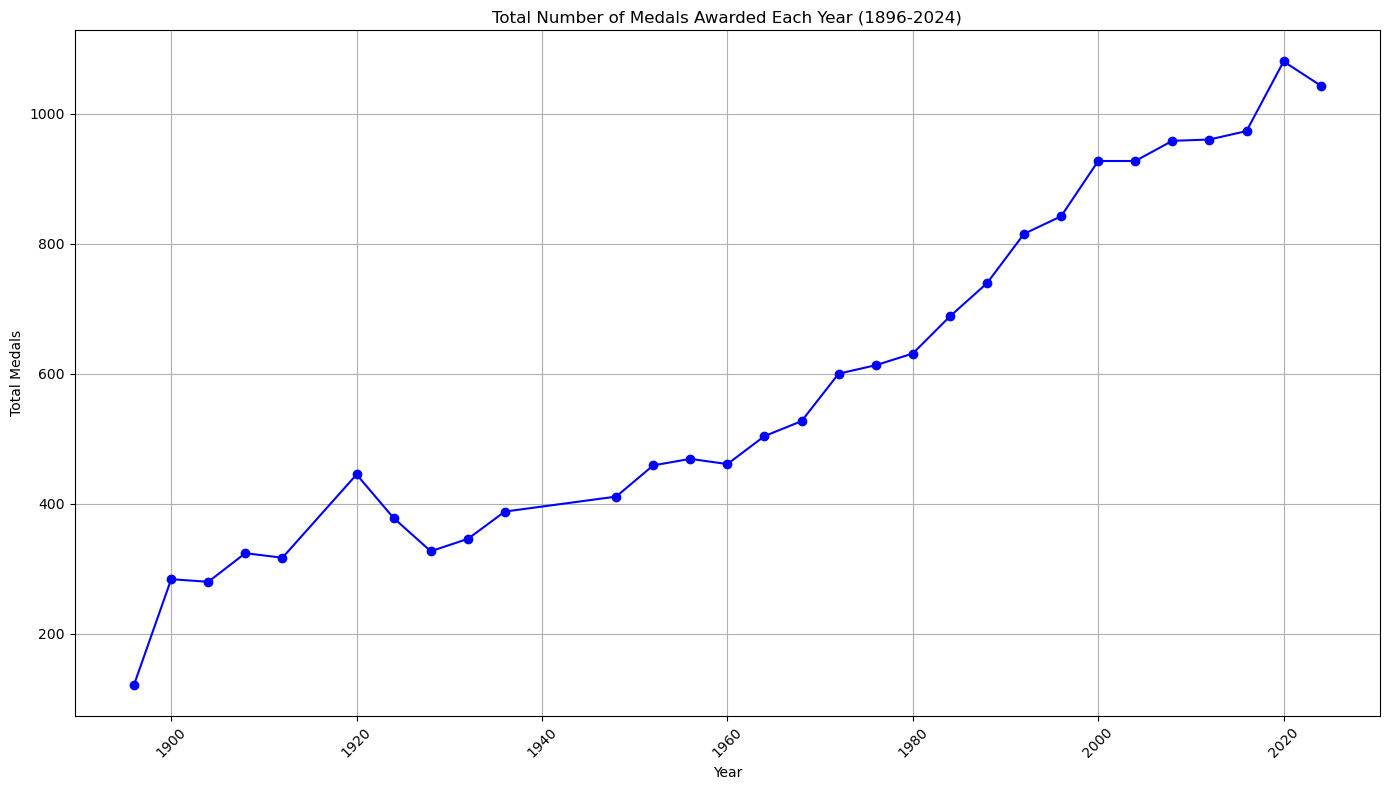

In [50]:
# Group by 'Year' and sum the total number of medals (though 'Total_Medals' should already be summed)
medals_by_year = df.groupby('Year')['Total_Medals'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(medals_by_year['Year'], medals_by_year['Total_Medals'], marker='o', linestyle='-', color='b')
plt.title('Total Number of Medals Awarded Each Year (1896-2024)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## *Total Medals Won by the US Over the Years*

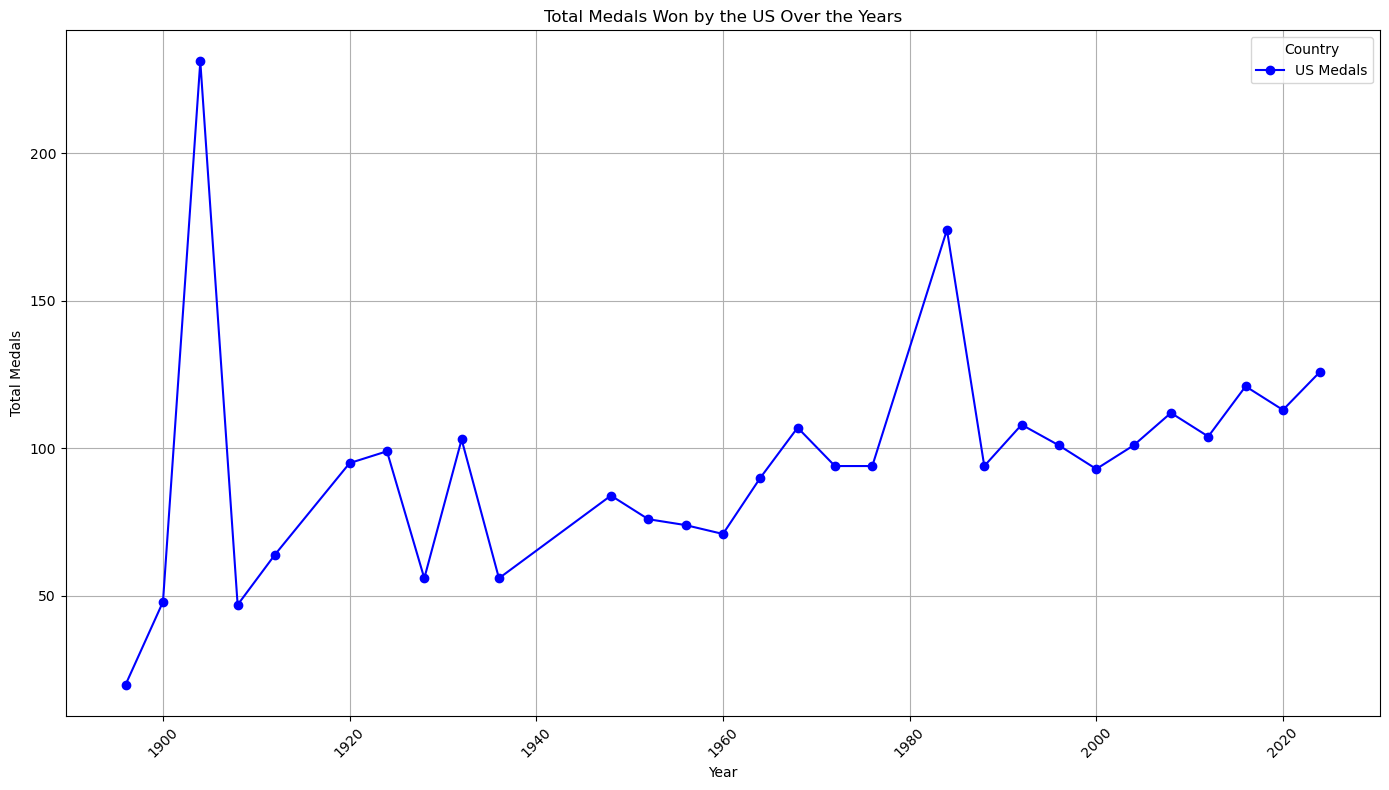

In [51]:
# Ensure 'Year' and 'Total_Medals' columns are correctly formatted
df['Year'] = df['Year'].astype(int)
df['Total_Medals'] = df['Total_Medals'].astype(int)

# Filter data for the US
us_data = df[df['Country_Name'] == 'United States']

# Aggregate total number of medals by year
us_medals_per_year = us_data.groupby('Year')['Total_Medals'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(us_medals_per_year['Year'], us_medals_per_year['Total_Medals'], marker='o', color='blue', label='US Medals')

plt.title('Total Medals Won by the US Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Medals Distribution by Country Top 15*

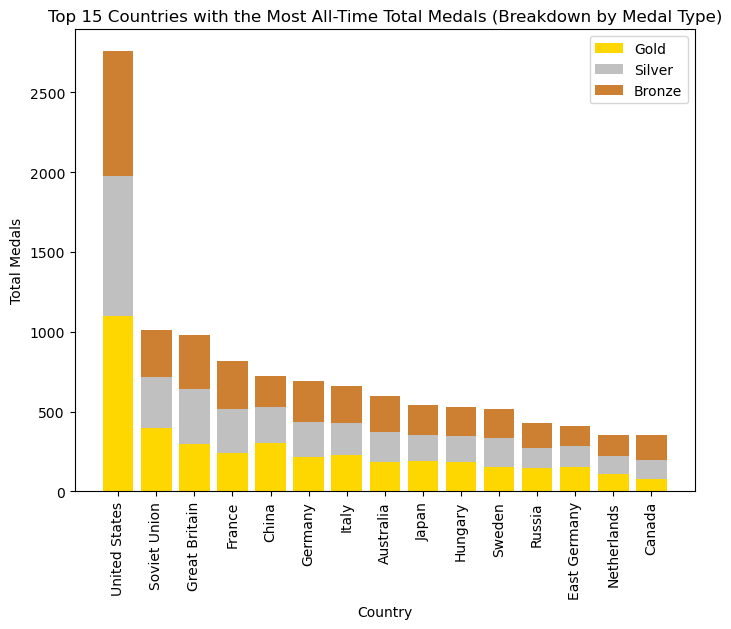

In [52]:
# Calculate the total gold, silver, and bronze medals won by each country
medal_totals = df.groupby('Country_Name').agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum'
})

# Calculate the total medals and sort countries by total medals
medal_totals['Total_Medals'] = medal_totals['Gold'] + medal_totals['Silver'] + medal_totals['Bronze']
sorted_medal_totals = medal_totals.sort_values(by='Total_Medals', ascending=False).head(15)

# Create a vertical stacked bar chart
plt.figure(figsize=(8, 6))

# Plot each type of medal with different colors
plt.bar(sorted_medal_totals.index, sorted_medal_totals['Gold'], color='gold', label='Gold')
plt.bar(sorted_medal_totals.index, sorted_medal_totals['Silver'], color='silver', bottom=sorted_medal_totals['Gold'], label='Silver')
plt.bar(sorted_medal_totals.index, sorted_medal_totals['Bronze'], color='#cd7f32', bottom=sorted_medal_totals['Gold'] + sorted_medal_totals['Silver'], label='Bronze')

plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Top 15 Countries with the Most All-Time Total Medals (Breakdown by Medal Type)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

## *Total Medals for Selected Countries*

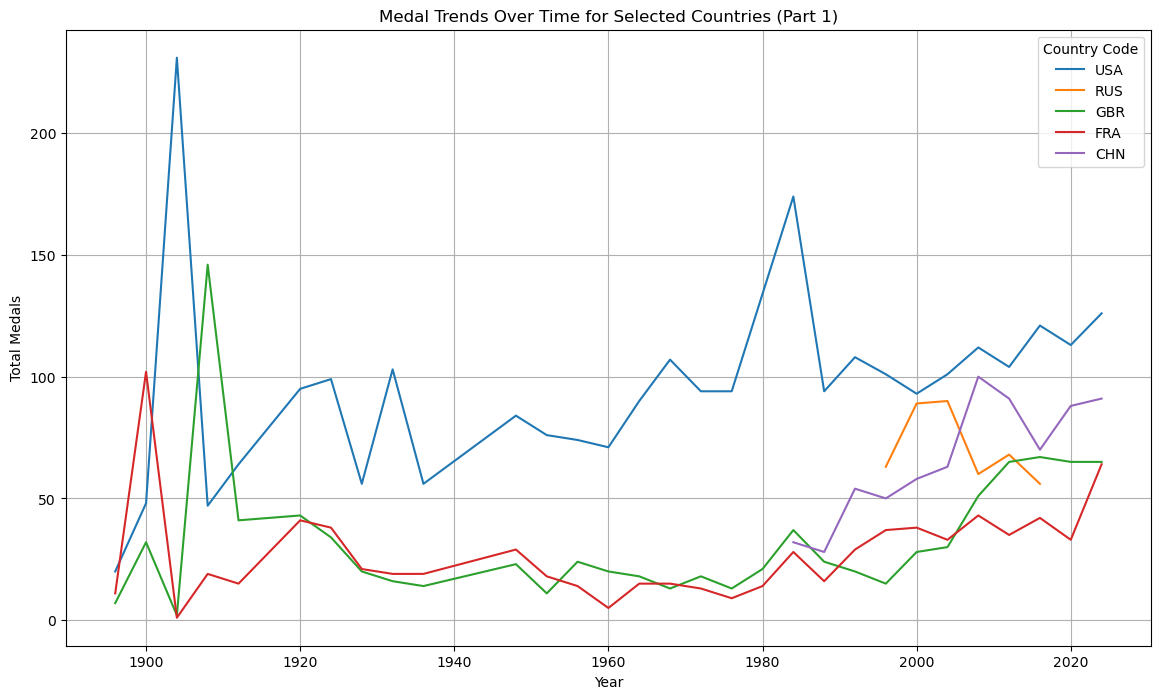

In [53]:
plt.figure(figsize=(14, 8))

# First set of countries to visualize
first_set_country_codes = ['USA', 'RUS', 'GBR', 'FRA', 'CHN']
for country_code in first_set_country_codes:
    if country_code in df['Country_Code'].unique():
        country_data = df[df['Country_Code'] == country_code]
        plt.plot(country_data['Year'], country_data['Total_Medals'], label=country_code)
    else:
        print(f"Warning: {country_code} not found in the dataset")

plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Medal Trends Over Time for Selected Countries (Part 1)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

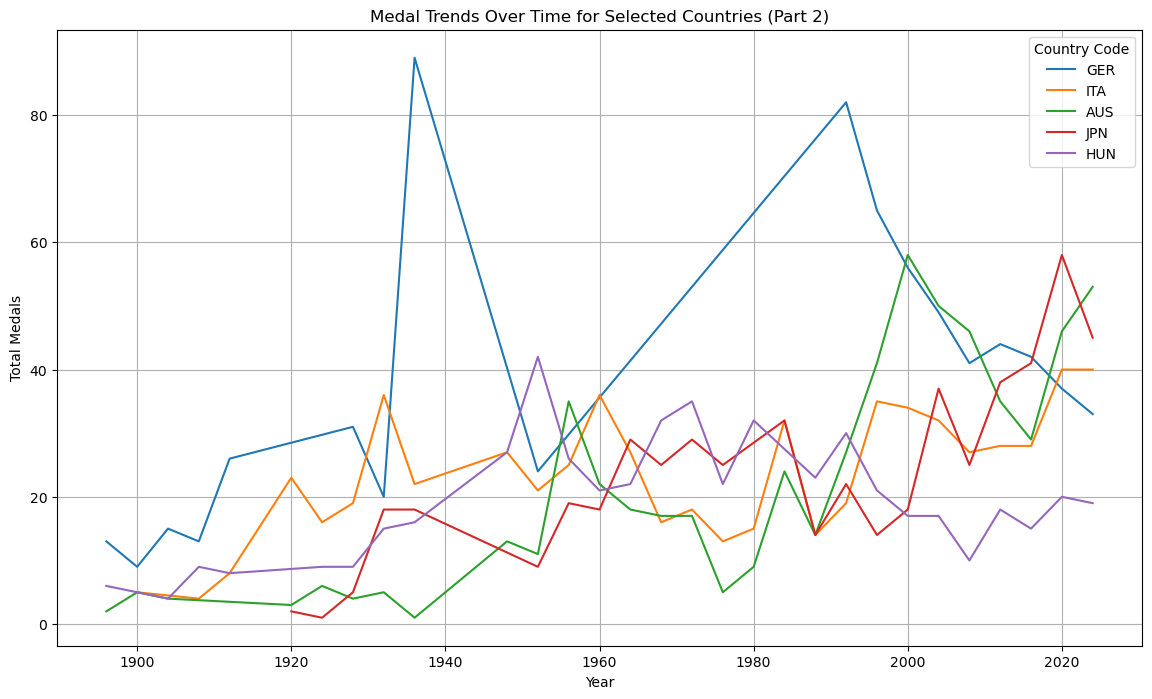

In [54]:
plt.figure(figsize=(14, 8))

# Second set of countries to visualize
second_set_country_codes = ['GER', 'ITA', 'AUS', 'JPN', 'HUN']
for country_code in second_set_country_codes:
    if country_code in df['Country_Code'].unique():
        country_data = df[df['Country_Code'] == country_code]
        plt.plot(country_data['Year'], country_data['Total_Medals'], label=country_code)
    else:
        print(f"Warning: {country_code} not found in the dataset")

plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Medal Trends Over Time for Selected Countries (Part 2)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

## *Most Common Medal won By USA Yearly*

In [55]:
# Filter the DataFrame for 'United States'
us_medals = df[df['Country_Name'] == 'United States']

# Determine the most common medal for each year and its count
us_medals['Most_Common_Medal_Amount'] = us_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
us_medals_summary = us_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']]

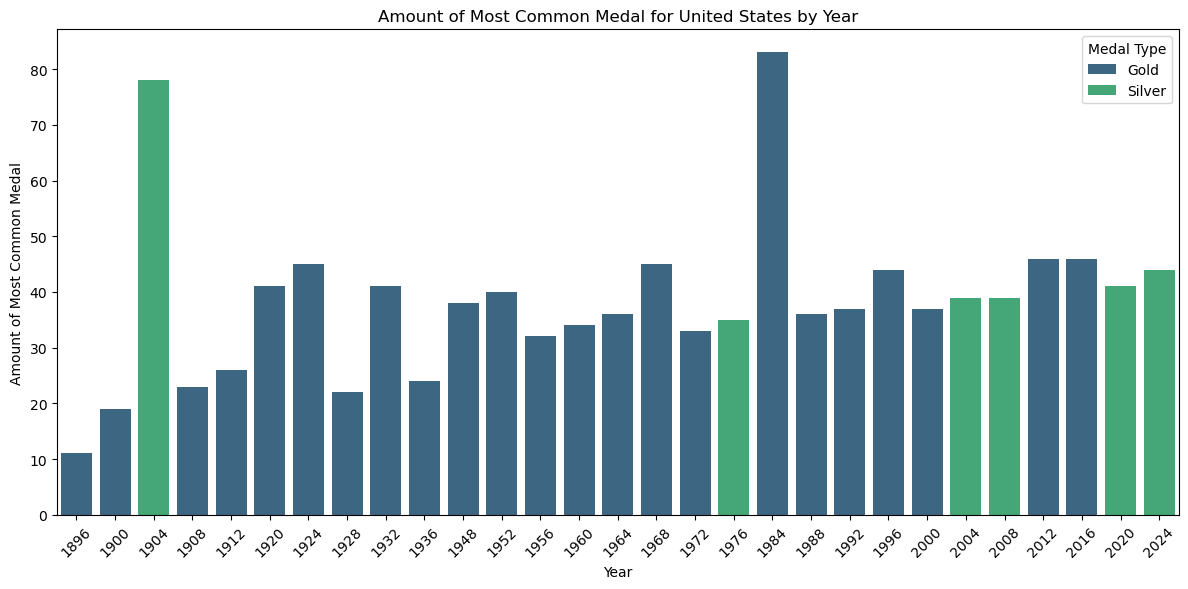

In [56]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot the bar plot
sns.barplot(data=us_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for United States by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## *Medals Distribution by Continent*

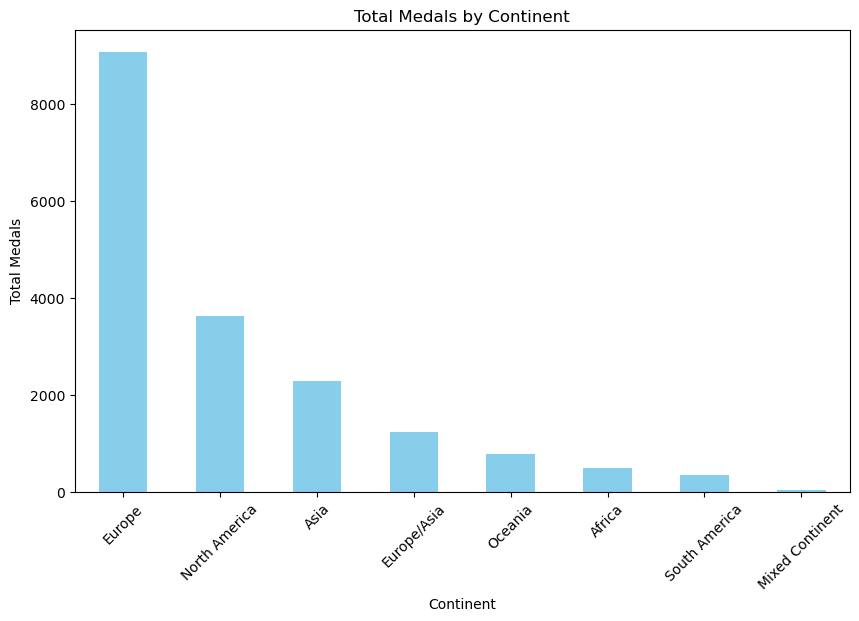

In [57]:
# Grouping total medals by continent
continent_medal_counts = df.groupby('continent')['Total_Medals'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
continent_medal_counts.plot(kind='bar', color='skyblue')
plt.title('Total Medals by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

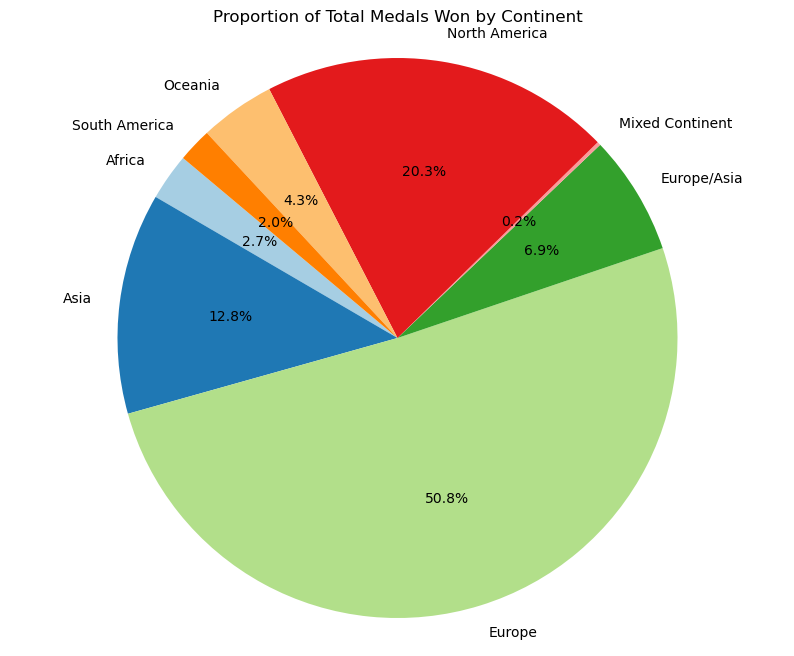

In [58]:
# Calculate the total medals won by each continent
continent_medals = df.groupby('continent')['Total_Medals'].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(continent_medals, labels=continent_medals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(continent_medals))))
plt.title('Proportion of Total Medals Won by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## *Most common Medal won By Each Continent Every Year*

### *Europe*

In [59]:
# Filter the DataFrame for Europe
europe_medals = df[df['continent'] == 'Europe']

# Determine the amount of the most common medal for each year
europe_medals['Most_Common_Medal_Amount'] = europe_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
europe_medals_summary = europe_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(europe_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
1424  2024            Bronze                         2
823   1996              Gold                         1
886   2000            Bronze                         1
1069  2008            Bronze                         4
1143  2012            Silver                         1
1179  2016            Silver                         3
1337  2020            Silver                         2
1410  2024            Silver                         3
5     1896              Gold                         2
31    1900            Silver                         3
43    1904              Gold                         1
57    1908            Bronze                         1
76    1912            Silver                         2
125   1924            Silver                         3
160   1928              Gold                         2
186   1932            Bronze                         3
193   1936            Silver                         6
229   1948

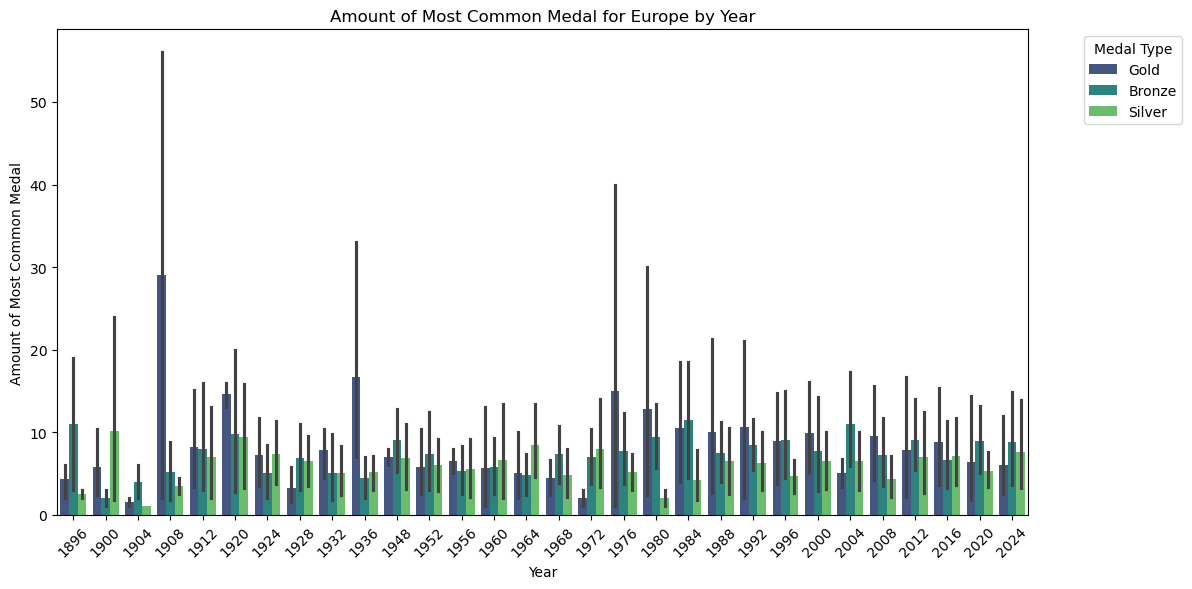

In [60]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=europe_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Europe by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *North America*

In [61]:
# Filter the DataFrame for North America
na_medals = df[df['continent'] == 'North America']

# Determine the amount of the most common medal for each year
na_medals['Most_Common_Medal_Amount'] = na_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
na_medals_summary = na_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(na_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
312   1956            Bronze                         1
393   1964              Gold                         1
730   1992            Bronze                         1
804   1996            Silver                         1
850   2000              Gold                         2
984   2004              Gold                         1
1043  2008            Silver                         1
1146  2012              Gold                         1
1234  2016              Gold                         1
1262  2020              Gold                         2
885   2000            Bronze                         1
542   1976            Bronze                         1
1342  2020              Gold                         1
369   1960            Bronze                         2
28    1900              Gold                         1
37    1904              Gold                         4
45    1908            Bronze                        10
72    1912

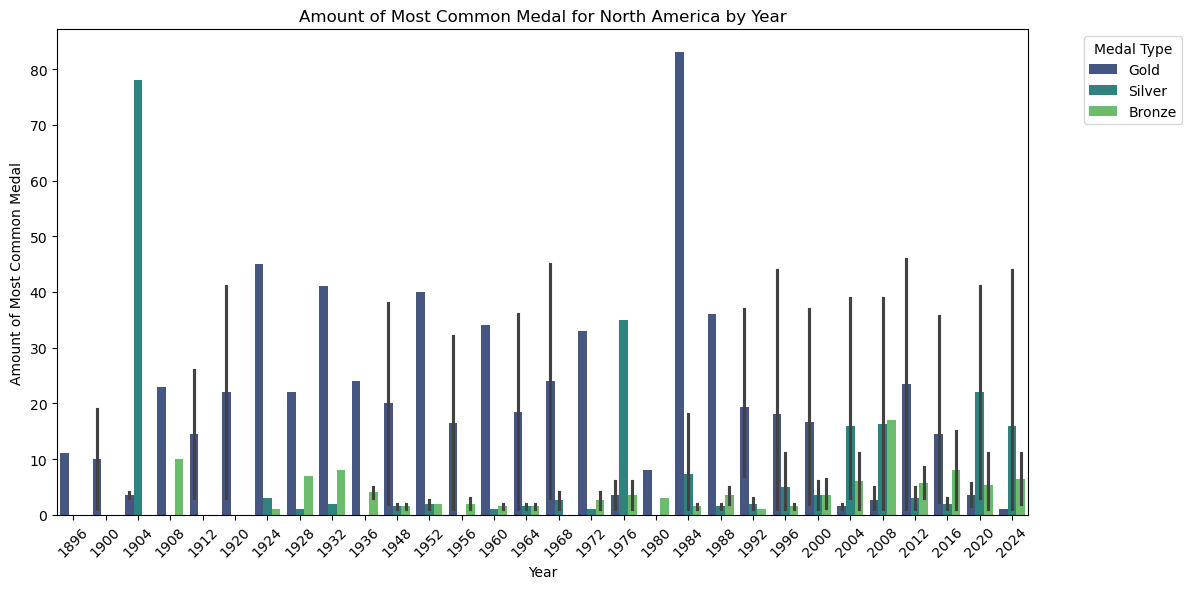

In [62]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=na_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for North America by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Asia*

In [63]:
# Filter the DataFrame for Asia
asia_medals = df[df['continent'] == 'Asia']

# Determine the amount of the most common medal for each year
asia_medals['Most_Common_Medal_Amount'] = asia_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
asia_medals_summary = asia_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(asia_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
1055  2008            Bronze                         1
1140  2012            Bronze                         1
1148  2012              Gold                         1
1231  2016              Gold                         1
1299  2020            Silver                         1
1376  2024              Gold                         2
260   1948            Silver                         1
607   1984              Gold                        15
662   1988            Bronze                        12
717   1992            Silver                        22
786   1996            Silver                        22
864   2000              Gold                        28
942   2004              Gold                        32
1020  2008              Gold                        48
1106  2012              Gold                        38
1196  2016              Gold                        26
1282  2020              Gold                        38
1345  2024

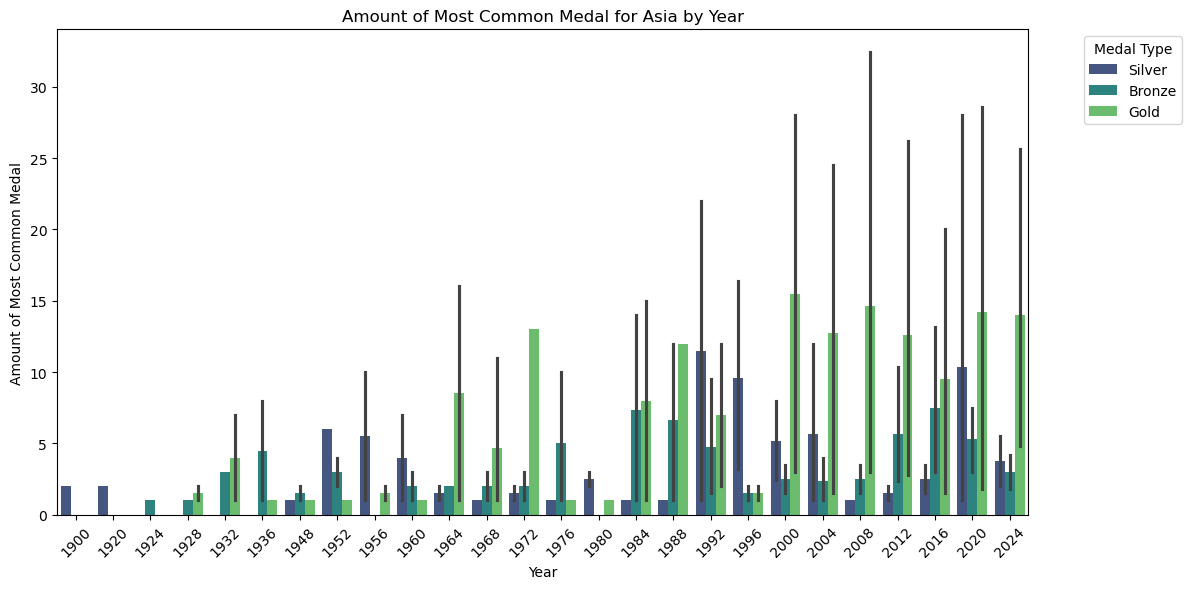

In [64]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=asia_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Asia by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Oceania*

In [65]:
# Filter the DataFrame for Oceania
oceania_medals = df[df['continent'] == 'Oceania']

# Determine the amount of the most common medal for each year
oceania_medals['Most_Common_Medal_Amount'] = oceania_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
oceania_medals_summary = oceania_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(oceania_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
59    1908            Silver                         2
78    1912            Bronze                         3
9     1896              Gold                         2
13    1900            Bronze                         3
39    1904            Silver                         3
85    1920            Silver                         2
110   1924              Gold                         3
157   1928            Silver                         2
166   1932              Gold                         3
212   1936            Bronze                         1
226   1948            Silver                         6
280   1952              Gold                         6
341   1956            Bronze                        14
354   1960              Gold                         8
426   1964            Bronze                        10
446   1968            Silver                         7
481   1972              Gold                         8
536   1976

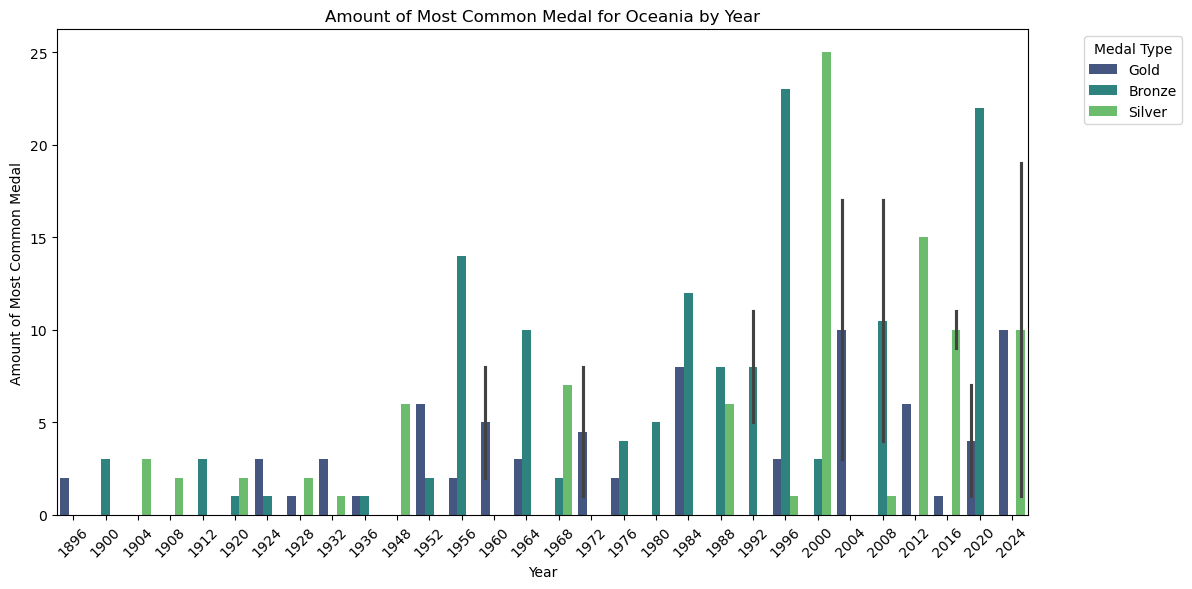

In [66]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=oceania_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Oceania by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *South America*

In [67]:
# Filter the DataFrame for South America
sa_medals = df[df['continent'] == 'South America']

# Determine the amount of the most common medal for each year
sa_medals['Most_Common_Medal_Amount'] = sa_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
sa_medals_summary = sa_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(sa_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
126   1924            Silver                         3
137   1928              Gold                         3
165   1932              Gold                         3
199   1936            Bronze                         3
228   1948              Gold                         3
268   1952            Silver                         2
328   1956            Silver                         1
385   1960            Silver                         1
411   1964            Silver                         1
459   1968            Bronze                         2
518   1972            Silver                         1
693   1988            Silver                         1
727   1992            Bronze                         1
836   1996            Silver                         2
882   2000            Silver                         2
980   2004            Bronze                         4
1008  2008            Bronze                         4
1094  2012

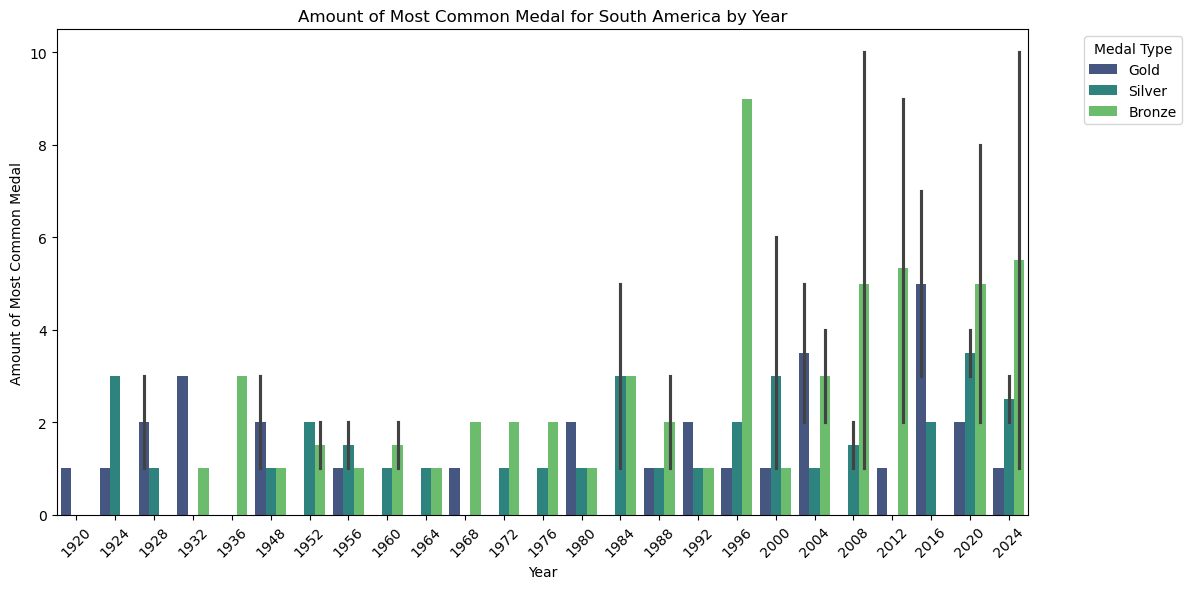

In [68]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=sa_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for South America by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Africa*

In [69]:
# Filter the DataFrame for Africa
africa_medals = df[df['continent'] == 'Africa']

# Determine the amount of the most common medal for each year
africa_medals['Most_Common_Medal_Amount'] = africa_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
africa_medals_summary = africa_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(africa_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
617   1984            Bronze                         2
747   1992              Gold                         1
776   1996              Gold                         2
893   2000            Bronze                         3
1041  2008            Silver                         1
1144  2012              Gold                         1
1244  2016            Silver                         2
1382  2024              Gold                         2
1131  2012            Silver                         1
1320  2020            Bronze                         1
1399  2024              Gold                         1
821   1996              Gold                         1
1216  2016            Silver                         1
1428  2024            Bronze                         1
451   1968            Silver                         1
615   1984            Bronze                         1
905   2000              Gold                         1
985   2004

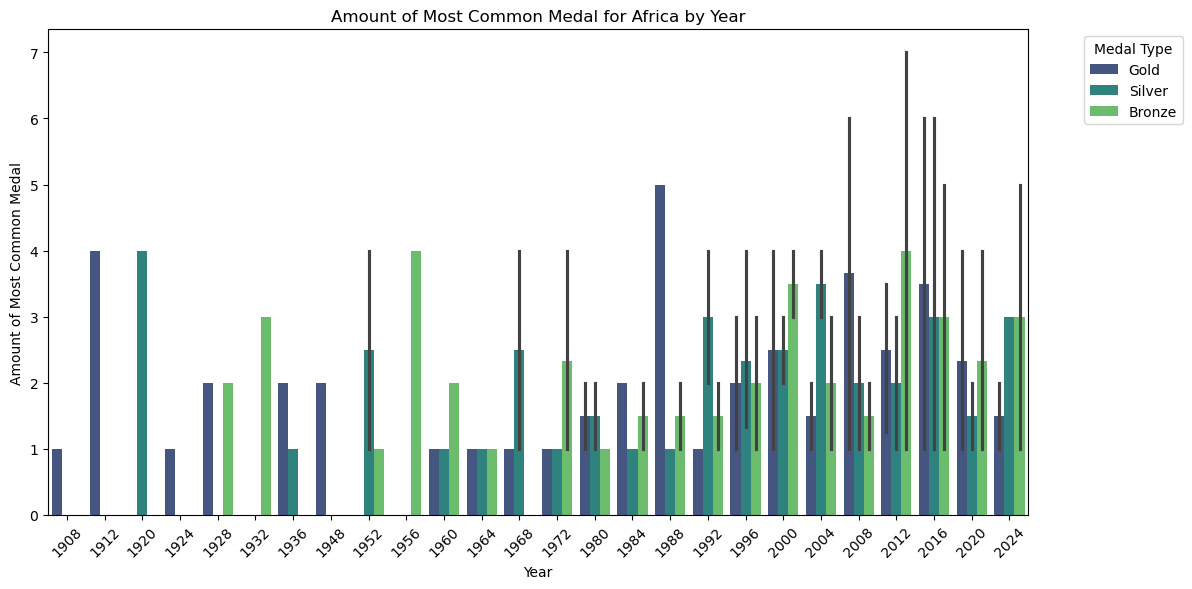

In [70]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=africa_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Africa by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## *Medal Efficiency By Continent*

In [71]:
continent_counts = df['continent'].value_counts()
print(continent_counts)

continent
Europe             673
Asia               253
North America      171
Africa             152
South America       93
Oceania             58
Europe/Asia         29
Mixed Continent      7
Name: count, dtype: int64


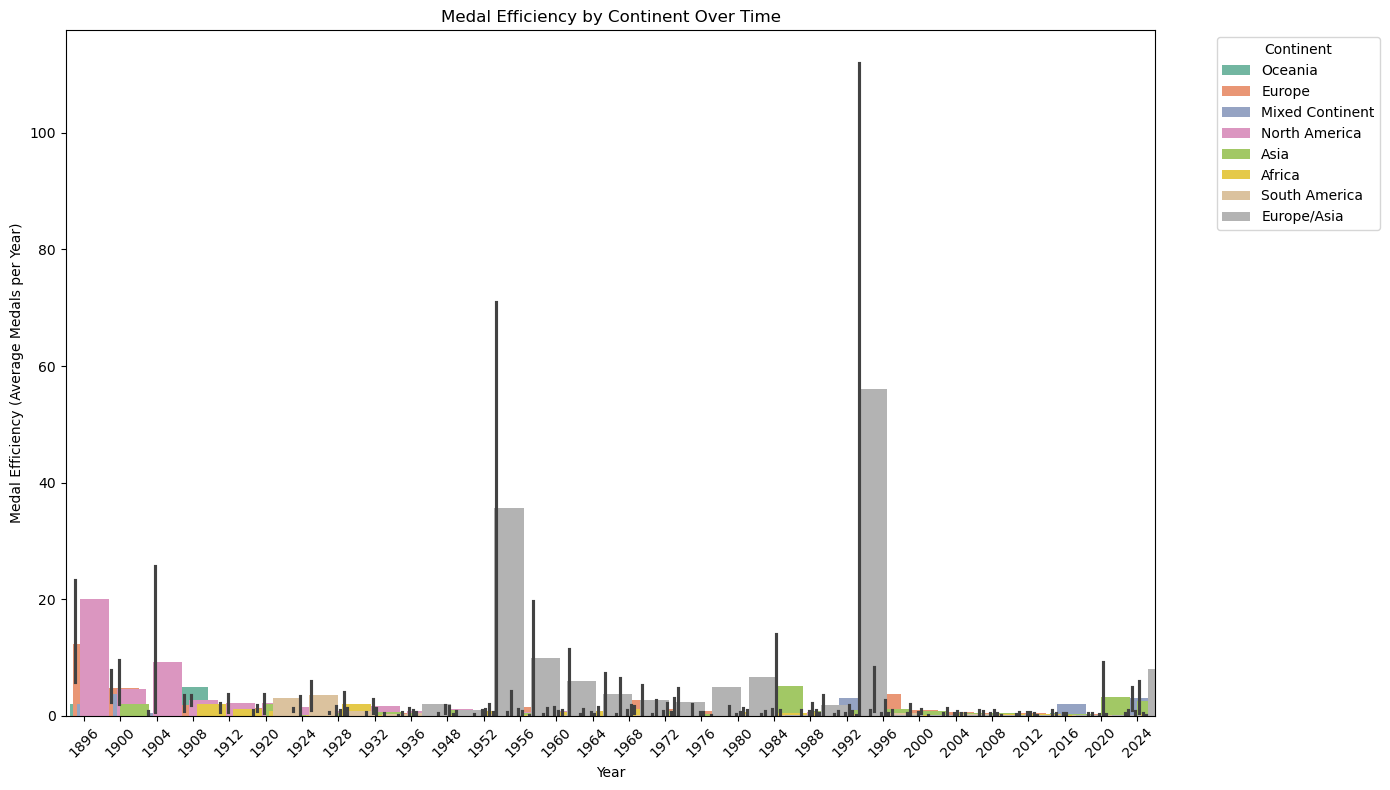

In [72]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a grouped bar chart with increased bar width
barplot = sns.barplot(data=df, x='Year', y='Medal_Efficiency', hue='continent', palette='Set2', dodge=True)

# Add titles and labels
plt.title('Medal Efficiency by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Efficiency (Average Medals per Year)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the bar width by setting the width of the bars
for patch in barplot.patches:
    patch.set_width(0.8)

# Move the legend outside the plot
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure the plot is easy to read
plt.tight_layout()

# Show the plot
plt.show()

## *Medal Efficiency by Country (Countries with an efficiency of at least 10)*

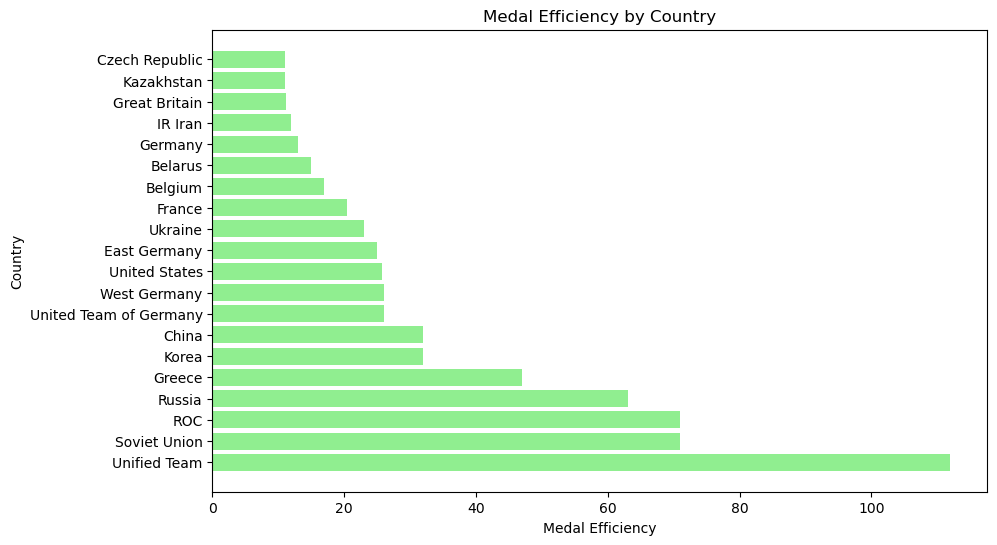

In [73]:
plt.figure(figsize=(10, 6))

# Filter the DataFrame to include only countries with Medal_Efficiency >= 10
df_filtered = df[df['Medal_Efficiency'] >= 10]

# Sort the filtered DataFrame by Medal_Efficiency
df_sorted_by_efficiency = df_filtered.sort_values(by='Medal_Efficiency', ascending=False)

# Create the barh plot
plt.barh(df_sorted_by_efficiency['Country_Name'], df_sorted_by_efficiency['Medal_Efficiency'], color='lightgreen')
plt.title('Medal Efficiency by Country')
plt.xlabel('Medal Efficiency')
plt.ylabel('Country')
plt.show()

## *Trend of Total Medals Over Time(Countries with at least 10 every year)*

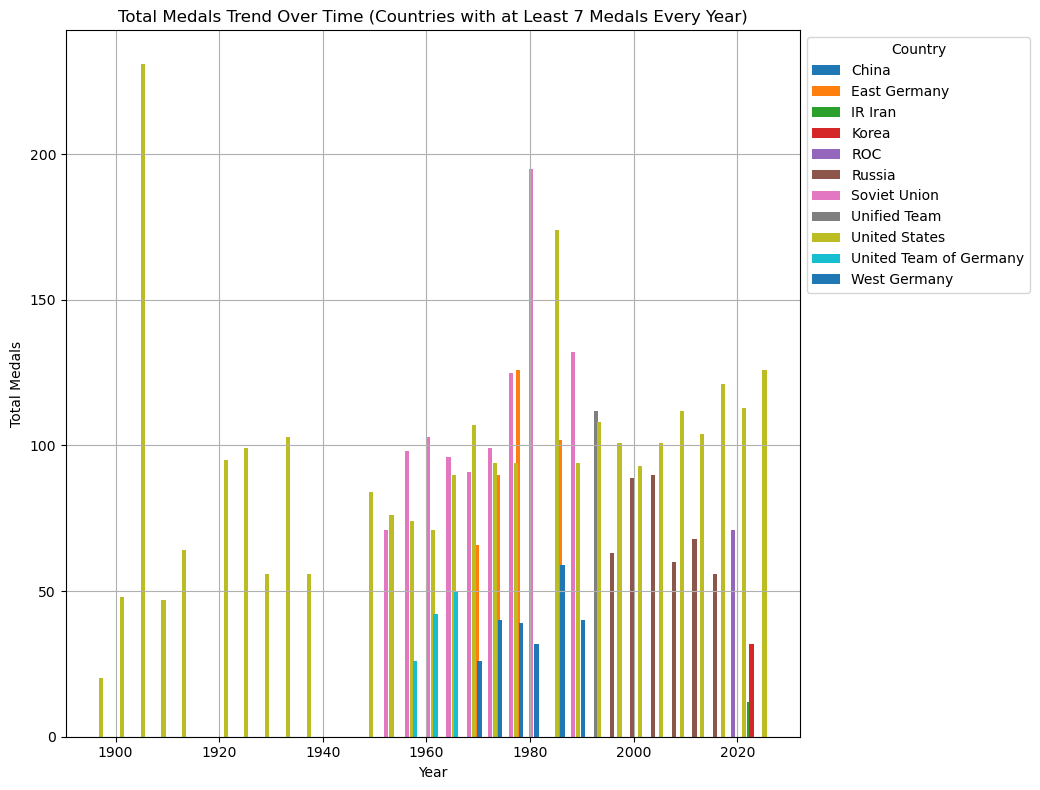

In [74]:
# Filter out countries with at least 3 total medals every year
countries_with_min_medals = df.groupby('Country_Name').filter(lambda x: (x['Total_Medals'] >= 12).all())

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot each country's data as a bar chart
for country in countries_with_min_medals['Country_Name'].unique():
    country_df = countries_with_min_medals[countries_with_min_medals['Country_Name'] == country]
    plt.bar(country_df['Year'] + 0.5 * (list(countries_with_min_medals['Country_Name'].unique()).index(country) - len(countries_with_min_medals['Country_Name'].unique())/2), 
            country_df['Total_Medals'], 
            width=0.8,
            label=country)

# Add titles and labels
plt.title('Total Medals Trend Over Time (Countries with at Least 7 Medals Every Year)')
plt.xlabel('Year')
plt.ylabel('Total Medals')

# Add legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

# Add grid
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])

# Show the plot
plt.show()

## *Host Advantage Impact*

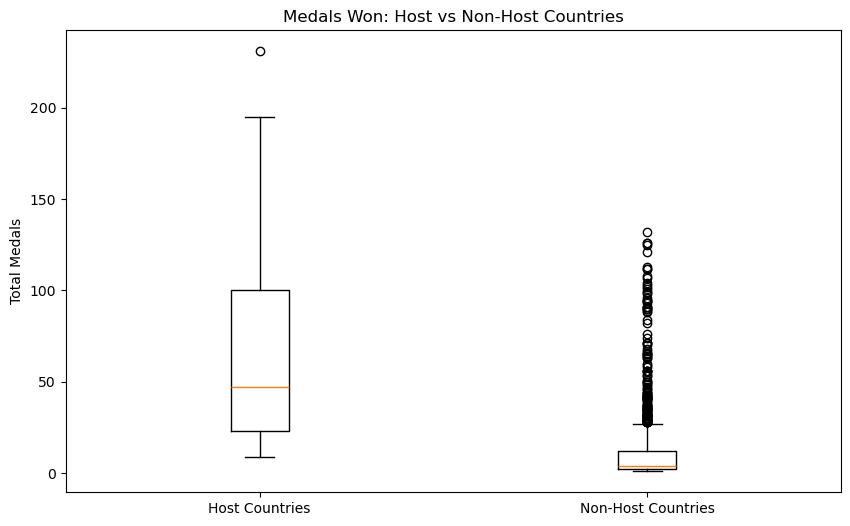

In [75]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Host_country'] == df['Country_Name']]['Total_Medals'], 
             df[df['Host_country'] != df['Country_Name']]['Total_Medals']],
            labels=['Host Countries', 'Non-Host Countries'])
plt.title('Medals Won: Host vs Non-Host Countries')
plt.ylabel('Total Medals')
plt.show()

## *Medal Trend Percentage in the United States*

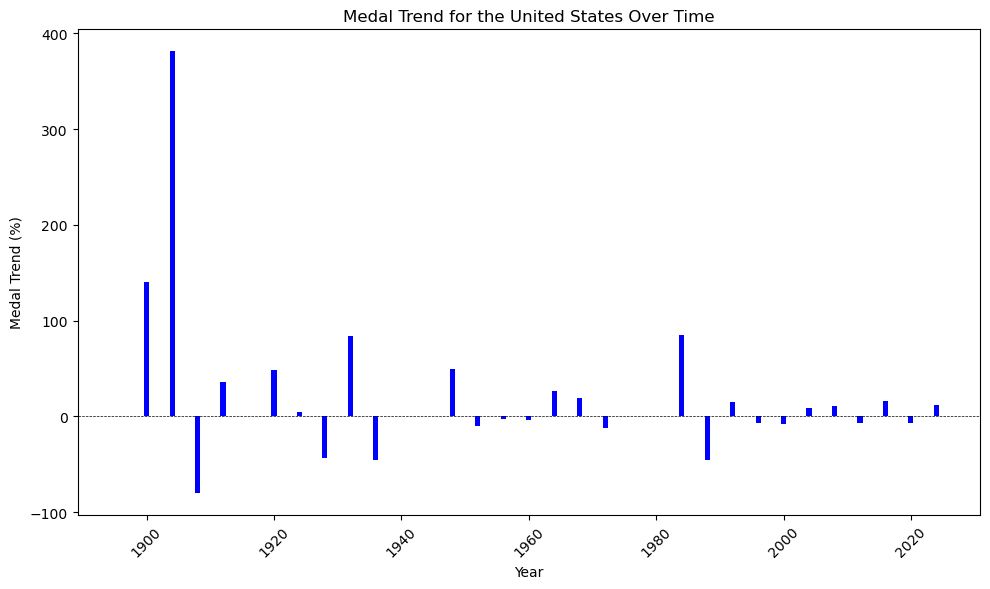

In [76]:
# Filter the DataFrame for the United States
us_data = df[df['Country_Name'] == 'United States']

# Plot the Medal Trend for the United States as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(us_data['Year'], us_data['Medal_Trend'], color='blue')

# Add titles and labels
plt.title('Medal Trend for the United States Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Trend (%)')

# Highlight the zero line for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## *Countries with most medals per year including count*

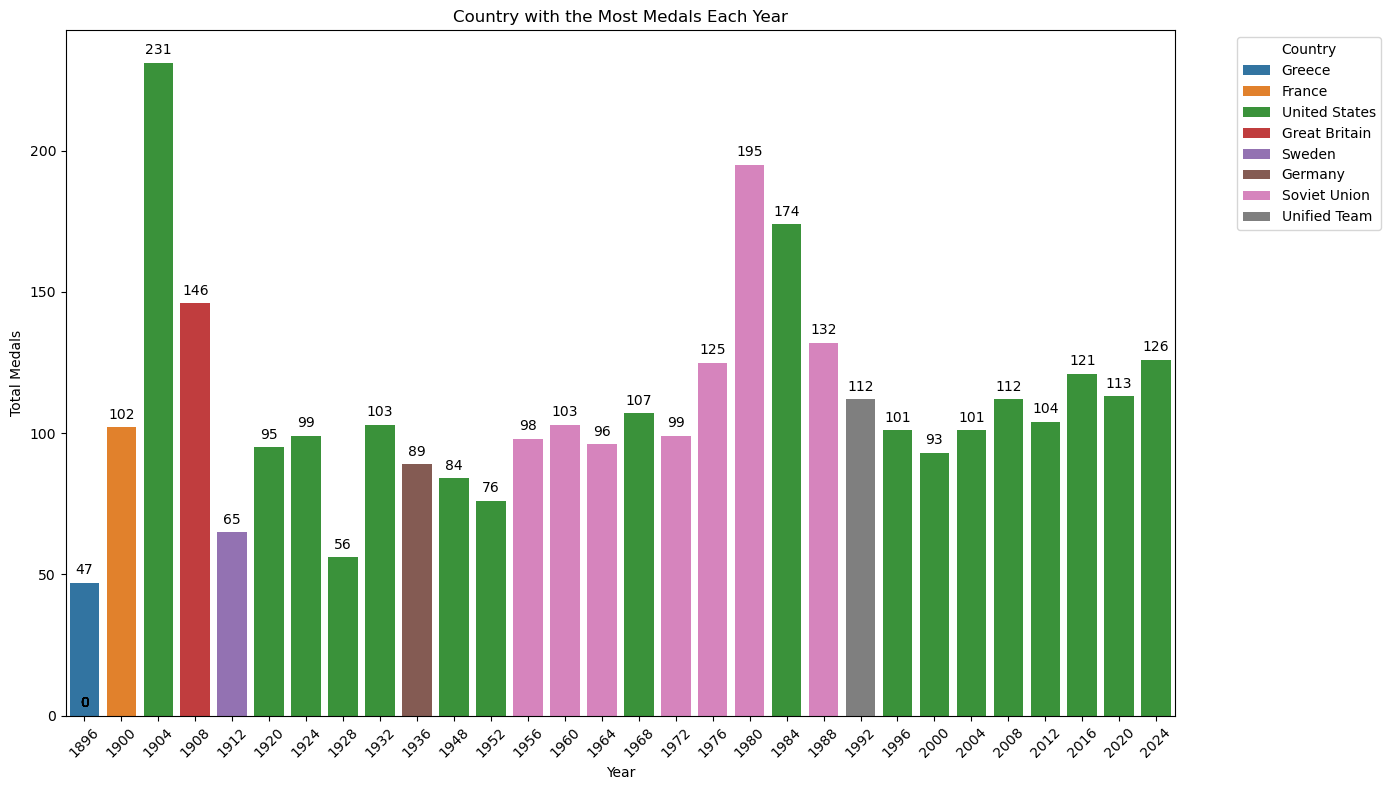

In [77]:
# Group by 'Year' and find the country with the maximum 'Total_Medals' each year
most_medals_per_year = df.loc[df.groupby('Year')['Total_Medals'].idxmax()]

# Plot the results
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Year', y='Total_Medals', data=most_medals_per_year, hue='Country_Name', dodge=False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Country with the Most Medals Each Year')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the number of medals above each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(format(height, '.0f'), 
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0, 9),  # 9 points vertical offset
                      textcoords='offset points')

plt.tight_layout()

# Show the plot
plt.show()

# *Hypothesis Testing*

## *Comparison of Medal Efficiency Across Continents*

- **Null Hypothesis (H0):** There is no difference in medal efficiency across different continents.
- **Alternative Hypothesis (H1):** Medal efficiency differs significantly between continents.

In [78]:
# Perform ANOVA
anova_result = stats.f_oneway(*[df[df['continent'] == continent]['Medal_Efficiency'] for continent in df['continent'].unique()])
print(f"Medal Efficiency Across Continents Test:\nF-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

# Print result interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: Medal efficiency differs significantly between continents.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medal efficiency between continents.")

Medal Efficiency Across Continents Test:
F-statistic: 11.29, P-value: 0.0000
Reject the null hypothesis: Medal efficiency differs significantly between continents.


ANOVA (Analysis of Variance): This test compares the average Medal_Efficiency across different continents to see if there are significant differences.

F-statistic: Measures how much the means of different groups (continents) vary relative to the variation within each group. An F-statistic close to 1 suggests that the variation between groups is similar to the variation within groups. Here, the F-statistic of 0.91 is relatively low, indicating minimal difference between the continents.

P-value: The probability of observing an F-statistic as extreme as, or more extreme than, the one obtained if the null hypothesis were true. A p-value of 0.4731 is quite high, suggesting that the observed differences in Medal_Efficiency could easily be due to chance.

Interpretation:

Fail to Reject the Null Hypothesis: Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). This means there is not enough evidence to conclude that medal efficiency differs significantly between continents.
Layman's Terms
What it means:

Medal Efficiency Across Continents: The test results suggest that there is no significant difference in how efficiently countries from different continents win medals.

In simpler terms:

No Big Difference: When comparing the average number of medals won per year by countries from different continents, the differences are not significant enough to say that one continent performs much better or worse than another.







## *Host Advantage Hypothesis*

- **Null Hypothesis (H0):** There is no difference in the number of medals won by countries based on whether they are the host city.
- **Alternative Hypothesis (H1):** Countries win significantly different numbers of medals based on whether they are the host city.

In [79]:
# Filter the DataFrame to select the total medals won by countries when they are the host nation
host_country_medals = df[df['Host_country'] == df['Country_Name']]['Total_Medals']
non_host_country_medals = df[df['Host_country'] != df['Country_Name']]['Total_Medals']

# Perform t-test
t_stat, p_value = stats.ttest_ind(host_country_medals, non_host_country_medals)
print(f"Impact of Host Country on Medal Counts Test:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
# Print result interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in medals won by host countries vs. non-host countries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medals won by host countries vs. non-host countries.")

Impact of Host Country on Medal Counts Test:
T-statistic: 14.96, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in medals won by host countries vs. non-host countries.



Statistical Explanation:
The hypothesis test yielded a T-statistic of 14.96 and a P-value of 0.0000. Given that the P-value is significantly less than the common significance level of 0.05, we reject the null hypothesis. This result indicates that there is strong statistical evidence to suggest a significant difference in the number of medals won by host countries compared to non-host countries. The high T-statistic also reflects a large difference between the two groups, suggesting that hosting the Olympics is associated with a substantial increase in the number of medals won by the host country.

Layman's Explanation:
The results of the test show that countries hosting the Olympics tend to win significantly more medals than countries that are not hosting. The difference is so clear and strong that it’s extremely unlikely to have happened by chance. This means that hosting the Olympics gives a big advantage to the host country, leading them to win more medals.

## *Impact of Medal Type on Efficiency Rates*

- **Null Hypothesis (H0):** There is no difference in medal efficiency among different medal types (Gold, Silver, Bronze).
- **Alternative Hypothesis (H1):** Medal efficiency differs significantly among different medal types.

In [80]:
# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Most_Common_Medal'] == 'Gold']['Medal_Efficiency'],
    df[df['Most_Common_Medal'] == 'Silver']['Medal_Efficiency'],
    df[df['Most_Common_Medal'] == 'Bronze']['Medal_Efficiency']
)
print(f"Effect of Medal Type on Medal Efficiency Test:\nF-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

# Print result interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: Medal efficiency differs significantly among different medal types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medal efficiency among medal types.")

Effect of Medal Type on Medal Efficiency Test:
F-statistic: 2.92, P-value: 0.0541
Fail to reject the null hypothesis: No significant difference in medal efficiency among medal types.


ANOVA (Analysis of Variance): This test examines whether there are significant differences in Medal_Efficiency among different types of medals (Gold, Silver, Bronze).

F-statistic: This value measures the ratio of the variance between the groups (medal types) to the variance within the groups. An F-statistic of 2.86 indicates that there is some difference in medal efficiency among the medal types, but it is not very large.

P-value: This value indicates the probability of observing the F-statistic or a more extreme value if the null hypothesis is true. A p-value of 0.0586 is just above the common threshold of 0.05. This suggests that the evidence is weak but close to being significant.

Interpretation:

Fail to Reject the Null Hypothesis: Since the p-value is slightly greater than 0.05, we fail to reject the null hypothesis (H0). This means that there is not enough strong evidence to conclude that medal efficiency differs significantly among Gold, Silver, and Bronze medals.

Layman's Terms

What it means:

Effect of Medal Type on Efficiency: The test results indicate that there isn't enough evidence to show a significant difference in how efficiently medals are won based on the type of medal (Gold, Silver, Bronze).

In simpler terms:

No Clear Difference: The data does not show a strong enough difference in how effectively countries win different types of medals. Whether a country wins Gold, Silver, or Bronze medals does not seem to significantly affect its overall efficiency in winning medals.

## *Medal efficiency across different countries*

- **Null Hypothesis (H0):** There is no significant difference in medal efficiency across different countries.

- **Alternative Hypothesis (H1):** There is a significant difference in medal efficiency across different countries.

In [81]:
# Group medal efficiency by country
grouped = df.groupby('Country_Name')['Medal_Efficiency'].apply(list)

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*grouped)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in medal efficiency across different countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in medal efficiency across different countries.")

F-statistic: 13.4489
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in medal efficiency across different countries.


**Statistical Analysis**
The ANOVA test conducted on the Medal_Efficiency across different countries yielded an F-statistic of 13.4489 and a p-value of 0.0000. The F-statistic measures the ratio of the variance between the groups (in this case, countries) to the variance within the groups. A higher F-statistic indicates that the variation between groups is larger than the variation within groups. The p-value, which is extremely low (0.0000), suggests that the observed differences in medal efficiency across countries are highly unlikely to have occurred by random chance.

Given that the p-value is below the common significance threshold of 0.05, we reject the null hypothesis. This result indicates that there is a statistically significant difference in medal efficiency across different countries, suggesting that some countries consistently convert their opportunities into medals more efficiently than others.

**Simple Explanation**
We analyzed whether different countries are better or worse at winning medals efficiently in the Olympics. The analysis shows that there is a clear difference between countries—some countries are much better at turning their opportunities into medals than others. The numbers tell us that this difference is not just random luck, but something real and significant.

## *Medal efficiency Effects on Medal Trends*

- **Null Hypothesis (H0):** There is no significant difference in medal efficiency based on the medal trend.
- **Alternative Hypothesis (H1):** There is a significant difference in medal efficiency based on the medal trend.

In [82]:
# Create a temporary Series to define categories based on Medal_Trend
medal_trend_category = np.where(df['Medal_Trend'] > 0, 'Positive Trend', 'Negative/No Trend')

# Group medal efficiency by the temporary Medal_Trend_Category
grouped = df.groupby(medal_trend_category)['Medal_Efficiency'].apply(list)

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*grouped)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in medal efficiency based on the medal trend.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in medal efficiency based on the medal trend.")

F-statistic: 2.6817
P-value: 0.1017
Fail to reject the null hypothesis: There is no significant difference in medal efficiency based on the medal trend.



**Statistical Analysis**
The ANOVA test comparing Medal_Efficiency based on Medal_Trend yielded an F-statistic of 2.6817 and a p-value of 0.1017. The F-statistic suggests that the variance between the groups (countries with different medal trends) is not substantially larger than the variance within the groups. The p-value of 0.1017 is above the common significance level of 0.05, meaning the observed differences in medal efficiency between the groups could reasonably occur due to random chance.

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in medal efficiency based on whether a country's medal trend is positive or negative/stable. In other words, the trend in a country's medal count over time does not appear to significantly impact how efficiently they win those medals.

**Layman's Explanation**
We tested whether countries that are getting better at winning medals over time are also more efficient at winning them. The results showed that there isn't a clear difference in efficiency based on whether a country's medal count is increasing or not. This means that just because a country is winning more medals doesn't necessarily mean they are better at doing it efficiently compared to countries with stable or declining medal counts. The differences we saw could just be due to chance.

## *Host Advantage Effect on Most Common Medal*

- **Null Hypothesis (H0):** Host Advantage does not have a significant effect on the Most Common Medal won by a country.
- **Alternative Hypothesis (H1):** Host Advantage does have a significant effect on the Most Common Medal won by a country.

In [83]:
# Create a contingency table for Most_Common_Medal and Host_Advantage
contingency_table = pd.crosstab(df['Most_Common_Medal'], df['Host_Advantage'])

# Perform Chi-Square Test
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Host Advantage has a significant effect on the Most Common Medal.")
else:
    print("Fail to reject the null hypothesis: Host Advantage does not have a significant effect on the Most Common Medal.")

Chi-Square Statistic: 13.5108
P-value: 0.0012
Reject the null hypothesis: Host Advantage has a significant effect on the Most Common Medal.


**Statistical Analysis**
The Chi-Square Test for Independence produced a Chi-Square Statistic of 13.5108 and a p-value of 0.0012.

Chi-Square Statistic: This value measures the extent to which the observed frequencies of the Most_Common_Medal categories (Gold, Silver, Bronze) differ from the expected frequencies under the assumption that there is no association between Host_Advantage and Most_Common_Medal. A higher Chi-Square Statistic suggests a larger difference between observed and expected frequencies.

P-value: The p-value of 0.0012 is significantly below the commonly used significance level of 0.05. This indicates that the observed association between Host_Advantage and Most_Common_Medal is highly unlikely to have occurred by chance.

Since the p-value is less than 0.05, we reject the null hypothesis. This result suggests that there is a significant effect of Host_Advantage on the type of medal a country wins most frequently. In other words, whether a country is a host or not appears to influence which type of medal (Gold, Silver, or Bronze) is most common for that country.

**Layman's Explanation**
The analysis shows that being a host country does indeed affect which medal type (Gold, Silver, or Bronze) a country wins the most. The results suggest that the advantage of hosting the Olympics influences the most common type of medal a country ends up with. This means that the trend of winning a particular medal type is not random but is related to whether or not a country is hosting the games.